## Basic Statistical Analysis
The purpose of performing statistical analysis is to 'clean' our data set

In [93]:
import glob
import pandas as pd
import copy
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
from scipy import stats

from helper_functions import cm_to_inch 

In [86]:
FILE_NUMBER = 0
USER = 'TP_5. prekomorske brigade_PLC_13555150_A+_15201'

In [39]:
# for example data replace the argument in glob.glob to 'example_data/*xlsx'
data_set = glob.glob('data/*xlsx')
print('Number of files: {}'.format(len(data_set)))

Number of files: 60


In [156]:
df = dict()
for count, data in tqdm(enumerate(data_set)):
    df[count] = pd.read_excel(data, skiprows=[1], skipfooter=1, parse_date=['Time'], index_col='Time')







0it [00:00, ?it/s]





1it [00:11, 11.57s/it]





2it [00:12,  8.35s/it]





3it [00:14,  6.34s/it]





4it [00:15,  4.96s/it]





5it [00:18,  4.20s/it]





6it [00:20,  3.55s/it]





7it [00:23,  3.41s/it]





8it [00:24,  2.82s/it]





9it [00:26,  2.46s/it]





10it [00:28,  2.37s/it]





11it [00:32,  2.92s/it]





12it [00:35,  2.81s/it]





13it [00:36,  2.27s/it]





14it [00:43,  3.72s/it]





15it [00:49,  4.41s/it]





16it [00:54,  4.53s/it]





17it [01:00,  5.08s/it]





18it [01:05,  5.11s/it]





19it [01:11,  5.42s/it]





20it [01:15,  4.83s/it]





21it [01:19,  4.62s/it]





22it [01:42, 10.24s/it]





23it [01:49,  9.13s/it]





24it [01:52,  7.34s/it]





25it [02:00,  7.48s/it]





26it [02:07,  7.43s/it]





27it [02:09,  5.64s/it]





28it [02:11,  4.66s/it]





29it [02:14,  4.21s/it]





30it [02:18,  4.13s/it]





31it [02:20,  3.35s/it]





32it [02:32,  5.99s/it]





33it [02:39,  6.30s/it]





34it [02:43,  5.76s/it

In [157]:
def data_completeness(data):
    zero = [value for value in data if value == 0]
    compl = (1 - len(zero) / len(data)) * 100
    return compl

In [158]:
def data_artifact(data):
    data_dc = copy.deepcopy(np.array(data))
    slope = [abs(data_dc[i + 1] - data[i]) for i in range(len(data_dc) - 1)]
    dx = abs(np.diff(data_dc))
    avg_data_dc = np.mean(data_dc)
    avg_dx = np.mean(dx)
    std = np.std(dx)
    for i in range(1, len(data_dc) - 1, 1):
        if data_dc[i] > 20.0 and (abs(data_dc[i] - data_dc[i - 1])) > 10 * avg_dx \
        and (abs(data_dc[i + 1] - data_dc[i])) > 10 * avg_dx:
            data_dc[i] = (data_dc[i - 1] + data_dc[i + 1]) / 2.0
    result = np.where(data_dc < 50.0, data_dc, 0)
    return result

In [159]:
def usability_evaluation(data, complete, compl_max, compl_min, compl_avg, compl_std):
    usable_users = dict()
    n = 0
    for pos in tqdm(data):
        for name in data[pos]:
            time_series = data_artifact(data[pos][name])
            complete.append(data_completeness(time_series))
            if complete[n] > 90.0:
                compl_max.append(sorted(np.delete(time_series, np.where(time_series == 0)))[-1])
                compl_min.append(sorted(np.delete(time_series, np.where(time_series == 0)))[1])
                compl_avg.append(np.mean(time_series))
                compl_std.append(np.std(time_series))
                usable_users[name] = data[pos][name] 
            n += 1
            
    return usable_users

In [160]:
compl = []
compl_max = []
compl_min =  []
compl_avg = []
compl_std = []
users = usability_evaluation(df, compl, compl_max, compl_min, compl_avg, compl_std)







  0%|                                                                                           | 0/60 [00:00<?, ?it/s]





  2%|█▍                                                                                 | 1/60 [00:23<23:10, 23.57s/it]





  3%|██▊                                                                                | 2/60 [00:25<16:21, 16.93s/it]





  5%|████▏                                                                              | 3/60 [00:28<12:16, 12.91s/it]





  7%|█████▌                                                                             | 4/60 [00:31<09:21, 10.02s/it]





  8%|██████▉                                                                            | 5/60 [00:36<07:37,  8.32s/it]





 10%|████████▎                                                                          | 6/60 [00:40<06:26,  7.17s/it]





 12%|█████████▋                                                                         | 7/60 [00:48<06:24,  7.25s/it]

In [161]:
plt.style.use(['seaborn'])
plt.rcParams["font.family"] = "Times new roman"
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['font.size'] = 15
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

Text(0, 0.5, '<E>_h [kWh]')

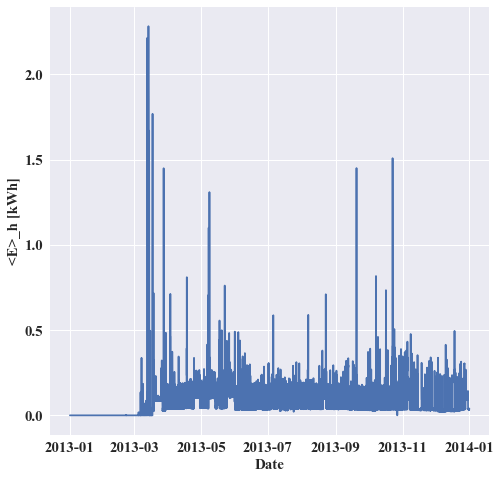

In [162]:
plt.figure(figsize=(cm_to_inch(20), cm_to_inch(20)))
plt.plot(df[FILE_NUMBER].index, df[FILE_NUMBER][USER])
plt.xlabel('Date', fontsize=15)
plt.ylabel('<E>_h [kWh]', fontsize=15)

Text(0, 0.5, 'N')

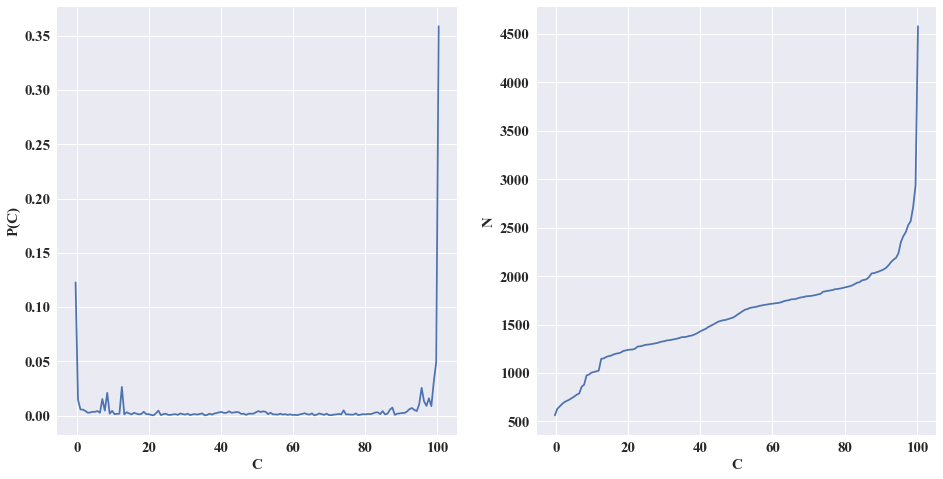

In [163]:
plt.figure(figsize = (cm_to_inch(40), cm_to_inch(20)))
res1 = stats.relfreq(compl, numbins = 150)
res2 = stats.cumfreq(compl, numbins = 150)

x = res1.lowerlimit + np.linspace(0, res1.binsize * res1.frequency.size, res1.frequency.size)
y = res2.lowerlimit + np.linspace(0, res2.binsize * res2.cumcount.size, res2.cumcount.size) 


plt.subplot(121)
plt.plot(x, res1.frequency)
plt.xlabel('C', fontsize = 15)
plt.ylabel('P(C)', fontsize = 15)

plt.subplot(122)
plt.plot(y, res2.cumcount)
plt.xlabel('C', fontsize = 15)
plt.ylabel('N', fontsize = 15)

In [164]:
relative_std = list()
for i in range(len(compl_std)):
    relative_std.append(compl_std[i] / compl_avg[i])

Text(0, 0.5, 'avg E [kWh]')

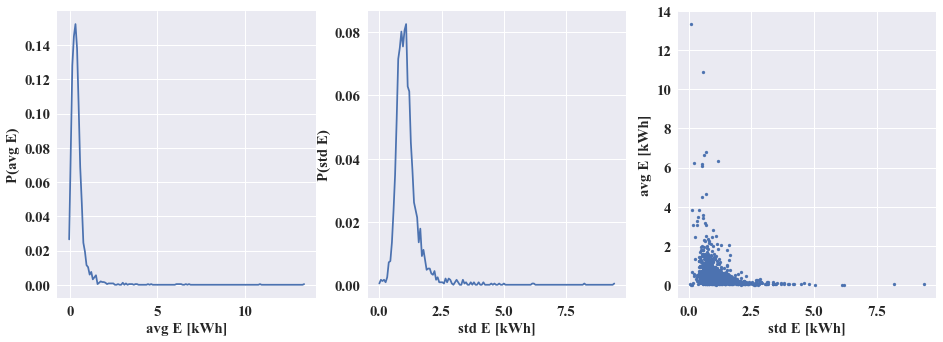

In [165]:
plt.figure(figsize = (cm_to_inch(40), cm_to_inch(13.4)))

res1 = stats.relfreq(compl_avg, numbins = 150)
x = res1.lowerlimit + np.linspace(0, res1.binsize * res1.frequency.size, res1.frequency.size)

plt.subplot(131)
plt.plot(x, res1.frequency)
plt.xlabel('avg E [kWh]', fontsize = 15)
plt.ylabel('P(avg E)', fontsize = 15)

res1 = stats.relfreq(relative_std, numbins = 150)
x = res1.lowerlimit + np.linspace(0, res1.binsize * res1.frequency.size, res1.frequency.size)

plt.subplot(132)
plt.plot(x, res1.frequency)
plt.xlabel('std E [kWh]', fontsize = 15)
plt.ylabel('P(std E)', fontsize = 15)

plt.subplot(133)
plt.scatter(relative_std, compl_avg, s = 9)
plt.xlabel('std E [kWh]', fontsize = 15)
plt.ylabel('avg E [kWh]', fontsize = 15)

## Extract usable time series to excel
This data will be needed for future data manipulation

In [166]:
users = pd.DataFrame.from_dict(users)
users.to_excel('usable_users.xlsx')